In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alumni-dataset/Project Demography and behavioural for use.xlsx


In [13]:
df = pd.read_excel("/kaggle/input/alumni-dataset/Project Demography and behavioural for use.xlsx")

In [14]:
# 1. Load all sheets
sheets = pd.read_excel(file_path, sheet_name=None)  # dict: {sheet_name: DataFrame}
print("Loaded sheets:", list(sheets.keys()))
print()

# 2. Print each sheet (head + shape) so you can inspect quickly
for name, df in sheets.items():
    print("="*80)
    print(f"Sheet: {name} — shape: {df.shape}")
    # display first 10 rows (or fewer if small)
    display(df.head(10))
    print("\n")    

# 3. Standardize Class column across sheets
# We'll try a list of likely column names and create/normalize a 'Class' column for each sheet.
possible_class_cols = [
    'PROGRAMME TITLE', 'Class', 'CLASS', 'Alumni Class (Eg: FTMBA 1, AMP 23, etc.)',
    'Alumni Class', 'Program', 'program', 'Programme'
]

def extract_standard_class(df):
    # find the first matching column name
    for col in possible_class_cols:
        if col in df.columns:
            s = df[col].astype(str).fillna('UNKNOWN').str.strip().str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()
            return s
    # fallback: try to infer column containing 'class' substring
    for col in df.columns:
        if 'class' in str(col).lower():
            s = df[col].astype(str).fillna('UNKNOWN').str.strip().str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()
            return s
    # last fallback: create UNKNOWN for all rows
    return pd.Series(['UNKNOWN'] * len(df))

# Add standardized Class column to each dataframe in the dict (do not overwrite original columns)
sheets_std = {}
for name, df in sheets.items():
    df_copy = df.copy()
    df_copy['Class'] = extract_standard_class(df_copy)
    sheets_std[name] = df_copy

print("Standardized 'Class' column added to each sheet.\n")

# 4. Merge them together
# We'll create a list of dataframes with the Class col first, then suffix other columns by sheet name to avoid collisions.
dfs_for_merge = []
for name, df in sheets_std.items():
    # move 'Class' to be first column for readability
    cols = list(df.columns)
    if 'Class' in cols:
        cols.remove('Class')
        cols = ['Class'] + cols
    df = df[cols].copy()
    # optional: reduce memory by dropping truly large unnecessary columns here if needed
    dfs_for_merge.append((name, df))


Loaded sheets: ['Sheet1', 'DataBase', 'Attendance', 'Learning Interest Survey', 'Financial Membership Dues', 'Mentoring', 'Placement']

Sheet: Sheet1 — shape: (24, 14)


,2019,Unnamed: 1,2020,Unnamed: 3,2021,Unnamed: 5,2022,Unnamed: 7,2023,Unnamed: 9,2024(July),Unnamed: 11,2024 (December),Unnamed: 13
0,Class,Graduated,Class,Graduated,Class,Graduated,Class,Graduated,Class,Graduated,Class,Graduated,Class,Graduated
1,GCEO1,12,NaN,NaN,AMP33,15,GCEO2,23,GCEO3,11,CEP28,11,GCEO -A,4
2,AMP32,30,NaN,NaN,AMP34,15,AMP36,20,AMP38,18,AMP40,23,CEP29,12
3,OMP27,25,NaN,NaN,AMP35,16,AMP37,19,AMP39,21,OMP39,27,AMP41,20
4,OMP28,26,NaN,NaN,OMP29,29,OMP33,17,OMP36,27,SMP88,65,OMP40,36
5,SMP68,13,NaN,NaN,OMP30,28,OMP34,13,OMP37,26,SMP89,44,SMP90,54
6,SMP69,52,NaN,NaN,OMP31,14,OMP35,21,OMP38,26,AGMP23,11,SMP91,47
7,SMP70,26,NaN,NaN,OMP32,14,SMP80,62,SMP84,70,SA2,6,AGMP24,5
8,SMP71,54,NaN,NaN,SMP72,39,SMP81,33,SMP85,45,NaN,NaN,MAP19,29
9,AGMP10,10,NaN,NaN,SMP73,17,SMP82,53,SMP86,51,NaN,NaN,MAP20,54




Sheet: DataBase — shape: (1721, 14)


,S/N,PROGRAMME TITLE,END DATE,DESIGNATION,COMPANY,LOCATION / STATE BASED,INDUSTRY,PRODUCTS,YEARS OF EXPERIENCE,SEX,NATIONALITY,NAME OF SPOUSE,Unnamed: 12,Unnamed: 13
0,1,SMP 68,2019,Head of Operations,IHS Towers,Abuja,Telecom,Telcoms service,12,M,Nigerian,Salma Abdulkadir,NaN,NaN
1,2,SMP 68,2019,Branch Head,TrustBond Mortgage Bank Plc,Abuja,FSI,Mortgage Banking,14,M,Nigerian,Maryam Auta,NaN,NaN
2,3,SMP 68,2019,Relationship Manager,Leadway Assurance Co. Ltd,Abuja,FSI,Insurance,23,M,Nigerian,Tosin Awodimibola,NaN,NaN
3,4,SMP 68,2019,Regional Manager,OVH Energy Marketing Limited,Lagos,Oil & Gas,Petroleum Products,16,M,Nigerian,Oluwakemi Babarinsa,NaN,NaN
4,5,SMP 68,2019,Director,Kings Broadcasting,Abuja,Media,Media services,27,M,Nigerian,NaN,NaN,NaN
5,6,SMP 68,2019,"Head, Risk Management",Sigma Pensions Limited,Abuja,FSI,Pension Fund Administration,21,M,Nigerian,Lababatu Abba,NaN,NaN
6,7,SMP 68,2019,Area Operations Manager (Northern Region),Sundry Foods Limited,Abuja,Service,"Food Service (QSR, Bakery, Creamry",11,M,Nigerian,Nnenna Jude Ogbonna,NaN,NaN
7,8,SMP 68,2019,Marketing Manager,Notore Chemical Industries Limited,Abuja,Manufacturing,"Agro Chemicals, Agriculture Extension",10,M,Nigerian,Joke Ojo-Odiase,NaN,NaN
8,9,SMP 68,2019,Chief Compliance Officer,Sigma Pensions Limited,Abuja,FSI,Pension Fund Administration,12,M,Nigerian,Grace Arinze,NaN,NaN
9,10,SMP 68,2019,Head of Department,Premium Pension Limited,Abuja,FSI,Pension Fund Administration,21,M,Nigerian,Jamila Aminu Abubakar,NaN,NaN




Sheet: Attendance — shape: (3053, 7)


,S/N,Year,Class,Title,Position,Company,Location
0,1,2019.0,SMP37,Mrs,General Manager Medical Services,Nigerian Ports Authority,Lagos
1,2,2019.0,EMBA 15,Mrs.,Chief Operating Officer,INTEXT HOME OPTIONS LTD,Lagos
2,3,2019.0,EMBA16,Mr,Strategy Officer,First Bank Nigeria Limited,Lagos
3,4,2019.0,AgMp6,Mrs,Director,Activedge Technologies,Lagos
4,5,2019.0,EMBA 11,Mrs,MD/CEO,Bluestockings Limited,Lagos
5,6,2019.0,MAP2,Mr.,Asset Manager,SCM Capital Limited,Lagos
6,7,2019.0,SMP33,Mr,Contract Manager,Ericsson,Lagos
7,8,2019.0,EMBA21,Mr,MD/CEO,NEDVIV GLOBAL SERVICES LTD,Lagos
8,9,2019.0,AMP25,Engr.,Managing Director,Crisbec Consulting Ltd,Lagos
9,10,2019.0,AMP24,Chief,Director General/CEO,Institute of Directors Nigeria,Lagos




Sheet: Learning Interest Survey — shape: (158, 19)


,What area would you like to upskill in?,What types of events are you interested in attending?,How would you prefer to attend our events in the future?,LBSAA aims to communicate with alumni in a way that suits them. Which way(s) do you prefer to read or engage with?,How do you feel about the current level of communication from LBSAA/LBS?,What would you like to read more of in our publications?,Have you been back to campus since you left LBS?,Which of the following statements best describe your time at LBS?,Would you be willing to be involved in the following LBS/PAU activities?,Title,City & Country,"Alumni Class (Eg: FTMBA 1, AMP 23, etc.)",Employment Status,"Current/Most Recent Job Title ( ""N/A"", if none )","Current/Most Recent Job Employer ( ""N/A"", if none ) OR Name of Company if self-employed",Industry,How could LBS serve you better as an Alumnus/Alumna?,We place your privacy at the centre of our work. All data is held securely and will be treated confidentially and with sensitivity for the benefit of LBS. I acknowledge that my use of this feature or service is subject to the LBS Privacy Policy : https://www.lbs.edu.ng/privacy/ *,Years of Experience
0,"Entrepreneurship, Real Estate, Agribusiness, M...","Networking lunches & dinners, Webinars, Reunions",Either,"Emails, Whatsapp",I want to hear more,"Alumni Successes, Research highlights, Alumni ...",No,I had a satisfactory time,Speaking with students about careers,Mr,Lagos Nigeria,AGMP 14,Employed,Bank Examiner.,Central Bank of Nigeria,Public services,I like to play in the upstream agric space and...,I agree,15 - 20 years
1,"Agribusiness, Social & Political Environment o...","Networking lunches & dinners, Webinars, Lectur...",Either,"Emails, Text message, Whatsapp",It's about right,"Alumni Successes, Research highlights, Global ...",No,I had a good time,Speaking with students about careers,Mrs,Lagos Nigeria,AGMP 14,Self-employed,N /A,Muliticom International and Marketing Company Ltd,Business,NaN,I agree,More than 20 years
2,"Strategy, Real Estate, Leadership","Networking lunches & dinners, Webinars, Reunio...",Either,"Emails, Whatsapp",I want to hear more,"Alumni Successes, Research highlights, Alumni ...",No,I loved it,"Offering placement/internship opportunity, Men...",Mrs,Lagos Nigeria,AGMP14,Self-employed,NaN,NaN,Business,"Referrals, information and business updates",I agree,NaN
3,"Strategy, Entrepreneurship, Leadership, Social...","Networking lunches & dinners, Webinars, Reunio...",Physical,"Emails, Text message, Whatsapp",I want to hear more,"Alumni Successes, Research highlights, Alumni ...",No,I had a good time,"Speaking with students about careers, Mentorin...",Mr,"Lagos, Nigeria",AGMP14,Employed,"Head, Financial Inclusion",Letshego Microfinance Bank,Finance,By providing an opportunity to network and con...,I agree,10 - 15 years
4,"Strategy, Entrepreneurship, Accounting, Econom...","Webinars, Sports",Either,Emails,It's about right,"Alumni Successes, Research highlights, Global ...",Yes,I loved it,"Speaking with students about careers, Offering...",Mr.,"Lagos, Nigeria",AGMP5,Self-employed,CEO,NaN,Real Estate,Doing Just Right,I agree,More than 20 years
5,"Strategy, Entrepreneurship, Agribusiness","Networking lunches & dinners, Reunions, Lectur...",Physical,"Emails, lbsalumniconnect.com, Whatsapp, LBSAA ...",I want to hear more,"Alumni Successes, Research highlights, Global ...",Yes,I loved it,"Speaking with students about careers, Writing ...",MR,LAGOS / NIGERIA,AHMP 15,Employed,OPERATIONS ADVISOR,EXXONMOBIL CORPORATION,Other,More training on Marketing farm produce and eq...,I agree,More than 20 years
6,"Strategy, Entrepreneurship, Accounting, Econom...","Networking lunches & dinners, Webinars, Reunio...",Either,"Emails, Text message",It's about right,"Global activities, Alumni articles",Yes,I loved it,"Offering placement/internship opportunity, Men...",Mrs,Lagos Nigeria,AMP 11,Self-employed,MD,NaN,Education,NaN,I agree,More than 20 years
7,Leadership,"Networking 



Sheet: Financial Membership Dues — shape: (843, 4)


,S/N,Year,AMOUNT,CLASS
0,1,2019,195000,SMP39
1,2,2019,195000,AMP31/SMP52
2,3,2019,195000,SMP71
3,4,2019,195000,EMBA22B
4,5,2019,195000,SMP71
5,6,2019,195000,MAP7
6,7,2019,195000,SMP72
7,8,2019,195000,SMP69
8,9,2019,195000,AgMP12
9,10,2019,195000,SMP69




Sheet: Mentoring — shape: (82, 7)


,Would you be willing to be involved in the following LBS/PAU activities?,Title,City & Country,"Alumni Class (Eg: FTMBA 1, AMP 23, etc.)",Employment Status,"Current/Most Recent Job Title ( ""N/A"", if none )","Current/Most Recent Job Employer ( ""N/A"", if none ) OR Name of Company if self-employed"
0,Mentoring a current student,Mr.,"Arepo, Ogun State, Nigeria",AMP 26,Employed,GENERAL MANAGER(LIFE),LASACO ASSURANCE PLC
1,Mentoring a current student,Mr,"Lagos, Nigeria",AMP22,Employed,MD,Cyberspace Limited
2,Mentoring a current student,Mr.,Lagos. Nigeria.,EMBA 11,Employed,IT/Technical Auditor,EMTS (9mobile)
3,Mentoring a current student,mrs,"Lagos, Nigeria",MAP7,Self-employed,COO,Telenoetica Ltd
4,Mentoring a current student,Mr,Isheri Lagos Nigeria,OMP 20,Self-employed,Founder/CEO,AOC CONSULTING
5,Mentoring a current student,Mr.,"IKEJA, LAGOS, NIGERIA",SMP 27,Self-employed,VICE PRESIDENT,NaN
6,Mentoring a current student,Mr.,Nigeria,SMP 56,Employed,Executive Director,MagProtein Nigeria Limited
7,Mentoring a current student,Rev.,"Abuja, Nigeria",SMP 63,Employed,National Director,RHEMA Bible Training Centre Nigeria
8,Mentoring a current student,Mrs,Lagos Nigeria,SMP45,Employed,Company Secretary,MTN
9,Mentoring a current student,Mrs,Lagos Nigeria,SMP45,Employed,Company Secretary,MTN




Sheet: Placement — shape: (42, 7)


,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",AMP21,Self-employed,Principal Partner,Kola Ogungbola & Co. (Chartered Accountants)
0,Offering placement/internship opportunity,CEO1,Lagos,AMP22,Self-employed,CEO,NaN
1,Offering placement/internship opportunity,Mr.,"Lagos, Nigeria",EMBA17,Self-employed,CEO,V-Capital Consulting Ltd
2,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",FTMBA2,Self-employed,CEO,RCO & Associates
3,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",SMP44,Self-employed,Deputy Managing Director/Deputy Editor-in-Chief,The Sun Newspapers
4,Offering placement/internship opportunity,Mrs.,Lagos/Nigeria,SMP75,Employed,HR Manager,Pan-Atlantic University
5,Offering placement/internship opportunity,MR,LAGOS/NIGERIA,OPM17/AGMP05,Self-employed,DIRECTOR,ARIES SYSTEMCOM TECH ENGINEERING LIMITED
6,Offering placement/internship opportunity,Mr.,"Lekki, Lagos",EMBA23,Employed,Director,FIRS
7,Offering placement/internship opportunity,MR,"LAGOS, NIGERIA",AMP26,Self-employed,MANAGING CONSULTANT,BHL PROFESSIONAL SERVICES
8,"Offering placement/internship opportunity, Adv...",Engr.,"Port Harcourt, Nigeria",OMP17,Self-employed,MD/CEO,Jocaro Nigeria Ltd
9,"Offering placement/internship opportunity, Adv...",Mrs.,"Lagos, Nigeria",SMP47,Employed,"General Manager, Sales",BizCbook Nigeria Limited




Standardized 'Class' column added to each sheet.



In [15]:
import pandas as pd
import numpy as np
from functools import reduce
from IPython.display import display

file_path = "/kaggle/input/alumni-dataset/Project Demography and behavioural for use.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

# 0. helper funcs (similar to before but stricter filtering)
def standardize_class_series(s: pd.Series) -> pd.Series:
    s = s.fillna('UNKNOWN').astype(str).str.upper().str.strip()
    s = s.str.replace(r'[\|;]+', '/', regex=True)
    s = s.str.replace(r'\s+/\s+', '/', regex=True)
    s = s.str.replace(r'[^A-Z0-9/]', '', regex=True)
    s = s.replace('', 'UNKNOWN')
    return s

def ensure_alumni_id(df: pd.DataFrame, sheet_name: str) -> pd.DataFrame:
    df = df.copy()
    if 'S/N' in df.columns:
        df['Alumni_ID'] = sheet_name + "__" + df['S/N'].astype(str).str.strip().replace('nan','')
        mask_empty = df['Alumni_ID'].isna() | (df['Alumni_ID'].str.endswith('nan'))
        if mask_empty.any():
            df.loc[mask_empty, 'Alumni_ID'] = sheet_name + "__IDX" + df.loc[mask_empty].index.astype(str)
    else:
        df['Alumni_ID'] = sheet_name + "__IDX" + df.index.astype(str)
    return df

def split_multi_class_rows(df: pd.DataFrame, class_col: str='Class') -> pd.DataFrame:
    df = df.copy()
    if class_col not in df.columns:
        df[class_col] = 'UNKNOWN'
    df[class_col] = df[class_col].astype(str).str.split('/')
    df = df.explode(class_col).reset_index(drop=True)
    df[class_col] = df[class_col].astype(str).str.strip().replace('', 'UNKNOWN')
    return df

def is_valid_class_label(s):
    # keep labels that contain at least one letter (e.g., SMP68, AMP31). Adjust if you have valid numeric-only classes.
    return bool(pd.notna(s)) and (len(s) > 0) and bool(pd.Series(s).str.contains(r'[A-Z]').iloc[0])

# 1. Prepare sheets: standardize Class, Alumni_ID, explode multi-class
sheets_prepped = {}
for name, df in sheets.items():
    dfc = df.copy()
    # find best class column if exists
    possible_cols = ['PROGRAMME TITLE', 'Class', 'CLASS', 'Alumni Class (Eg: FTMBA 1, AMP 23, etc.)', 'Alumni Class']
    class_col = next((c for c in possible_cols if c in dfc.columns), None)
    if class_col:
        dfc['Class'] = standardize_class_series(dfc[class_col])
    else:
        # fallback: try any column containing 'class'
        found = None
        for c in dfc.columns:
            if 'class' in str(c).lower():
                found = c; break
        if found:
            dfc['Class'] = standardize_class_series(dfc[found])
        else:
            # If sheet is Sheet1 (year table) we still populate but we'll skip this sheet for class-level merge
            dfc['Class'] = 'UNKNOWN'
    dfc = ensure_alumni_id(dfc, name)
    dfc = split_multi_class_rows(dfc, 'Class')
    sheets_prepped[name] = dfc

# 2. Decide which sheets to include in class-level aggregation:
# Skip 'Sheet1' because it is a year-crosswalk table (you can parse it separately later)
skip_sheets = ['Sheet1']
include_sheets = [n for n in sheets_prepped.keys() if n not in skip_sheets]
print("Sheets included in class-level aggregation:", include_sheets)

# 3. For each included sheet, compute a class-level summary (one row per Class)
agg_summaries = {}
for name in include_sheets:
    dfc = sheets_prepped[name].copy()
    # drop rows with invalid class labels (purely numeric or 'UNKNOWN')
    dfc['Class_valid'] = dfc['Class'].apply(lambda x: bool(pd.notna(x)) and (x.upper() not in ['UNKNOWN','ERROR','NAN','']) and bool(pd.Series(x).str.contains(r'[A-Z]').iloc[0]))
    dfc = dfc[dfc['Class_valid']].copy()
    # Decide aggregations:
    # - numeric columns -> sum/mean depending on context
    # - Alumni_ID -> unique count (nunique)
    # - others -> nunique (gives idea of diversity)
    numeric_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    # ensure AMOUNT if exists is numeric (for dues)
    if 'AMOUNT' in dfc.columns:
        dfc['AMOUNT_NUM'] = pd.to_numeric(dfc['AMOUNT'], errors='coerce').fillna(0)
        numeric_cols = list(set(numeric_cols + ['AMOUNT_NUM']))
    agg_dict = {'Alumni_ID': 'nunique'}
    for c in numeric_cols:
        # for amounts we sum; for years etc you may prefer mean — here: sum for AMOUNT, mean for others
        if c.upper().startswith('AMOUNT') or c.upper().startswith('TOTAL') or c.upper().endswith('_NUM'):
            agg_dict[c] = 'sum'
        else:
            # safe default
            agg_dict[c] = 'mean'
    # for textual cols compute nunique to capture diversity (limit to few)
    few_text_cols = [c for c in dfc.columns if c not in numeric_cols + ['Class','Alumni_ID','Class_valid']]
    for c in few_text_cols:
        agg_dict[c] = pd.Series.nunique
    # perform aggregation
    summary = dfc.groupby('Class').agg(agg_dict).reset_index()
    # rename columns to include sheet name (except Class)
    rename_map = {c: f"{c}__{name}" for c in summary.columns if c != 'Class'}
    summary.rename(columns=rename_map, inplace=True)
    agg_summaries[name] = summary
    print(f"{name}: aggregated {summary.shape[0]} classes")

# 4. Merge all class-level summaries (outer join)
dfs = list(agg_summaries.values())
merged_class_level = reduce(lambda left,right: pd.merge(left,right,on='Class',how='outer'), dfs)
merged_class_level.fillna(0, inplace=True)
print("Merged class-level shape:", merged_class_level.shape)
display(merged_class_level.head(20))

# 5. Build the final features for clustering (safe derived features)
# We'll compute:
# Class_Size from DataBase__Alumni_ID if available else from Attendance__Alumni_ID or others
df_final = pd.DataFrame()
df_final['Class'] = merged_class_level['Class']

# Class size: prefer DataBase__Alumni_ID
if 'Alumni_ID__DataBase' in merged_class_level.columns:
    df_final['Class_Size'] = merged_class_level['Alumni_ID__DataBase']
else:
    # fallback: max across available Alumni_ID__sheet columns
    alumni_cols = [c for c in merged_class_level.columns if c.startswith('Alumni_ID__')]
    if alumni_cols:
        df_final['Class_Size'] = merged_class_level[alumni_cols].max(axis=1)
    else:
        df_final['Class_Size'] = 0

# Avg_Experience: try DataBase YEARS converted earlier if present
if any(c for c in merged_class_level.columns if 'YEARS' in c or 'EXPERIENCE' in c):
    cand = [c for c in merged_class_level.columns if 'EXPERIENCE' in c or 'YEARS' in c]
    df_final['Avg_Experience'] = merged_class_level[cand].mean(axis=1)
else:
    df_final['Avg_Experience'] = 0

# Female ratio: attempt from DataBase (if SEX was aggregated as nunique or mean)
# We didn't explicitly compute female counts earlier; so set default 0 and compute later if you want
df_final['Female_Ratio'] = 0

# Industry diversity: look for INDUSTRY__DataBase column
ind_col = next((c for c in merged_class_level.columns if c.startswith('INDUSTRY__')), None)
if ind_col:
    df_final['Industry_Diversity'] = merged_class_level[ind_col]
else:
    df_final['Industry_Diversity'] = 0

# Dues
if 'AMOUNT_NUM__Financial Membership Dues' in merged_class_level.columns:
    df_final['Total_Dues_Collected'] = merged_class_level['AMOUNT_NUM__Financial Membership Dues']
else:
    # sometimes the aggregated sum may have different name
    alt = next((c for c in merged_class_level.columns if 'AMOUNT' in c.upper()), None)
    df_final['Total_Dues_Collected'] = merged_class_level[alt] if alt is not None else 0

# Dues payer count
dues_payer_col = next((c for c in merged_class_level.columns if c.startswith('Alumni_ID__Financial Membership Dues')), None)
df_final['Dues_Participation_Rate'] = 0
if dues_payer_col:
    df_final['Dues_Participation_Rate'] = merged_class_level[dues_payer_col] / df_final['Class_Size'].replace(0,np.nan)
    df_final['Dues_Participation_Rate'] = df_final['Dues_Participation_Rate'].fillna(0)

# Attendance average
att_col = next((c for c in merged_class_level.columns if c.startswith('Alumni_ID__Attendance')), None)
if att_col:
    df_final['Avg_Attendance_Count'] = merged_class_level[att_col] / df_final['Class_Size'].replace(0,np.nan)
    df_final['Avg_Attendance_Count'] = df_final['Avg_Attendance_Count'].fillna(0)
else:
    df_final['Avg_Attendance_Count'] = 0

# Mentoring/Placement rates
ment_col = next((c for c in merged_class_level.columns if c.startswith('Alumni_ID__Mentoring')), None)
place_col = next((c for c in merged_class_level.columns if c.startswith('Alumni_ID__Placement')), None)
if ment_col:
    df_final['Mentoring_Offer_Rate'] = merged_class_level[ment_col] / df_final['Class_Size'].replace(0,np.nan)
else:
    df_final['Mentoring_Offer_Rate'] = 0
if place_col:
    df_final['Placement_Offer_Rate'] = merged_class_level[place_col] / df_final['Class_Size'].replace(0,np.nan)
else:
    df_final['Placement_Offer_Rate'] = 0

# Fill NaNs and remove obviously invalid Classes that slipped through (pure numbers)
df_final.replace([np.inf,-np.inf], np.nan, inplace=True)
df_final.fillna(0, inplace=True)
# Remove classes that are purely numeric or too short (likely artefacts)
df_final = df_final[df_final['Class'].str.contains(r'[A-Z]')].reset_index(drop=True)

print("Clean class-level dataframe ready for clustering:")
display(df_final.head(30))

Sheets included in class-level aggregation: ['DataBase', 'Attendance', 'Learning Interest Survey', 'Financial Membership Dues', 'Mentoring', 'Placement']
DataBase: aggregated 56 classes
Attendance: aggregated 395 classes
Learning Interest Survey: aggregated 90 classes
Financial Membership Dues: aggregated 145 classes
Mentoring: aggregated 57 classes
Placement: aggregated 0 classes
Merged class-level shape: (452, 65)


/tmp/ipykernel_36/4092495610.py:111: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_class_level.fillna(0, inplace=True)


,Class,Alumni_ID__DataBase,S/N__DataBase,END DATE__DataBase,PROGRAMME TITLE__DataBase,DESIGNATION__DataBase,COMPANY__DataBase,LOCATION / STATE BASED__DataBase,INDUSTRY__DataBase,PRODUCTS__DataBase,...,"Current/Most Recent Job Title ( ""N/A"", if none )__Mentoring","Current/Most Recent Job Employer ( ""N/A"", if none ) OR Name of Company if self-employed__Mentoring",Alumni_ID__Placement,Offering placement/internship opportunity__Placement,Mr__Placement,"Lagos, Nigeria__Placement",AMP21__Placement,Self-employed__Placement,Principal Partner__Placement,Kola Ogungbola & Co. (Chartered Accountants)__Placement
0,0MP24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,2021OUTLOOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,33A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,3RDMANAGEMENTACCELERATIONPROGRAMME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,3RDMANAGEMENTACCELLERATIONPROGRAMME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
6,AGMP01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
7,AGMP05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,AGMP06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
9,AGMP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


Clean class-level dataframe ready for clustering:


,Class,Class_Size,Avg_Experience,Female_Ratio,Industry_Diversity,Total_Dues_Collected,Dues_Participation_Rate,Avg_Attendance_Count,Mentoring_Offer_Rate,Placement_Offer_Rate
0,0MP24,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,2021OUTLOOK,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,33A,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,3RDMANAGEMENTACCELERATIONPROGRAMME,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,3RDMANAGEMENTACCELLERATIONPROGRAMME,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
5,A,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
6,AGMP01,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
7,AGMP05,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0
8,AGMP06,0.0,0.0,0,0.0,195000.0,0.000000,0.000000,0.0,0.0
9,AGMP1,0.0,0.0,0,0.0,195000.0,0.000000,0.000000,0.0,0.0


In [16]:
import re
import pandas as pd
import numpy as np
from IPython.display import display

# Assume sheets_prepped and agg_summaries exist from your last run.
# If not, re-run the pre-processing you used earlier. We rely on:
# merged_class_level (the merged class-level DataFrame) and sheets_prepped['DataBase'] available.

# 0) helper functions
def keep_valid_class(s):
    # keep if contains at least one letter and optionally digits; exclude length > 40 header-like strings
    if pd.isna(s): return False
    s = str(s).strip()
    if len(s) == 0: return False
    if len(s) > 40: return False
    # require at least one letter A-Z
    return bool(re.search(r'[A-Z]', s))

def parse_years_of_experience(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip().lower()
    # exact numeric?
    m = re.search(r'(\d+(\.\d+)?)', s)
    if 'more than' in s or '>' in s:
        # if we see "more than 20", return 22 (or choose 25). Adjust as needed.
        if m:
            return float(m.group(1)) + 2.0
        return np.nan
    if '-' in s:
        # range "10 - 15 years"
        parts = re.findall(r'(\d+)', s)
        if len(parts) >= 2:
            return (float(parts[0]) + float(parts[1])) / 2.0
    if 'less than' in s or '<' in s:
        if m:
            return max(float(m.group(1)) - 2.0, 0.0)
    if m:
        return float(m.group(1))
    return np.nan

# 1) Filter merged_class_level to keep only reasonable class labels
mcl = merged_class_level.copy()  # your merged class-level wide table
mcl = mcl[mcl['Class'].apply(keep_valid_class)].reset_index(drop=True)
print("After filtering class labels, classes:", mcl.shape[0])

# 2) Recompute Class_Size from DataBase if available (preferred canonical roster)
if 'Alumni_ID__DataBase' in mcl.columns:
    mcl['Class_Size'] = mcl['Alumni_ID__DataBase'].fillna(0).astype(int)
else:
    # fallback: take max across any Alumni_ID__* columns
    alumni_cols = [c for c in mcl.columns if c.startswith('Alumni_ID__')]
    if alumni_cols:
        mcl['Class_Size'] = mcl[alumni_cols].max(axis=1).fillna(0).astype(int)
    else:
        mcl['Class_Size'] = 0

# 3) Recompute Avg_Experience using raw DataBase sheet (preferred)
# Use sheets_prepped['DataBase'] (exploded and with Alumni_ID) if available
if 'DataBase' in sheets_prepped:
    db = sheets_prepped['DataBase'].copy()
    # ensure SEX normalized
    if 'SEX' in db.columns:
        db['SEX'] = db['SEX'].astype(str).str.upper().str.strip()
    else:
        db['SEX'] = np.nan
    # parse years of experience raw text column (original sheet column name)
    exp_col = None
    for c in db.columns:
        if 'YEAR' in c.upper() and 'EXPERIENCE' in c.upper() or 'EXPERIENCE' in c.upper():
            exp_col = c
            break
    if exp_col is None:
        # try 'YEARS OF EXPERIENCE'
        exp_col = 'YEARS OF EXPERIENCE' if 'YEARS OF EXPERIENCE' in db.columns else None

    if exp_col:
        db['YEARS_NUM'] = db[exp_col].apply(parse_years_of_experience)
    else:
        db['YEARS_NUM'] = np.nan

    # compute class-level mean experience and female ratio
    exp_agg = db.groupby('Class').agg(
        Avg_Experience_DB=('YEARS_NUM', 'mean'),
        Female_Count=('SEX', lambda s: s.eq('F').sum()),
        Sex_Count=('SEX', lambda s: s.replace('UNKNOWN', np.nan).notna().sum())
    ).reset_index()

    # join back to mcl
    mcl = mcl.merge(exp_agg, on='Class', how='left')
    mcl['Avg_Experience'] = mcl['Avg_Experience_DB'].fillna(0)
    mcl['Female_Ratio'] = mcl.apply(lambda r: (r['Female_Count']/r['Sex_Count']) if r['Sex_Count']>0 else 0, axis=1)
    mcl.drop(columns=['Avg_Experience_DB','Female_Count','Sex_Count'], inplace=True)
else:
    mcl['Avg_Experience'] = 0
    mcl['Female_Ratio'] = 0

# 4) Recompute Total_Dues_Collected and Dues_Participation_Rate using Financial sheet aggregations
# If you have 'AMOUNT_NUM__Financial Membership Dues' and 'Alumni_ID__Financial Membership Dues' in mcl
amt_col = next((c for c in mcl.columns if c.upper().startswith('AMOUNT') and 'FINANCIAL' in c.upper()), None)
dues_payer_col = next((c for c in mcl.columns if c.startswith('Alumni_ID__') and 'FINANCIAL' in c.upper()), None)

if amt_col:
    mcl['Total_Dues_Collected'] = mcl[amt_col].fillna(0)
else:
    # search for any AMOUNT-like column
    amt_col = next((c for c in mcl.columns if 'AMOUNT' in c.upper()), None)
    mcl['Total_Dues_Collected'] = mcl[amt_col].fillna(0) if amt_col else 0

if dues_payer_col:
    mcl['Dues_Participation_Rate'] = (mcl[dues_payer_col].fillna(0) / mcl['Class_Size'].replace(0,np.nan)).fillna(0)
else:
    mcl['Dues_Participation_Rate'] = 0

# 5) Attendance: avg attendance count per person
att_col = next((c for c in mcl.columns if c.startswith('Alumni_ID__') and 'ATTEND' in c.upper()), None)
att_total_col = next((c for c in mcl.columns if c.startswith('Event_Attendance_Total') or 'ATTEND' in c.upper() and 'TOTAL' in c.upper()), None)
if att_col:
    mcl['Avg_Attendance_Count'] = (mcl[att_col].fillna(0) / mcl['Class_Size'].replace(0, np.nan)).fillna(0)
elif att_total_col:
    mcl['Avg_Attendance_Count'] = (mcl[att_total_col].fillna(0) / mcl['Class_Size'].replace(0, np.nan)).fillna(0)
else:
    mcl['Avg_Attendance_Count'] = 0

# 6) Mentoring & Placement rates
ment_col = next((c for c in mcl.columns if c.startswith('Alumni_ID__') and 'MENTOR' in c.upper()), None)
place_col = next((c for c in mcl.columns if c.startswith('Alumni_ID__') and 'PLAC' in c.upper()), None)
mcl['Mentoring_Offer_Rate'] = (mcl[ment_col].fillna(0) / mcl['Class_Size'].replace(0,np.nan)).fillna(0) if ment_col else 0
mcl['Placement_Offer_Rate'] = (mcl[place_col].fillna(0) / mcl['Class_Size'].replace(0,np.nan)).fillna(0) if place_col else 0

# 7) Keep only final columns we want for clustering and drop tiny/unreliable classes
final_cols = ['Class','Class_Size','Avg_Experience','Female_Ratio','Industry_Diversity',
              'Total_Dues_Collected','Dues_Participation_Rate','Avg_Attendance_Count',
              'Mentoring_Offer_Rate','Placement_Offer_Rate']

# attempt to fill Industry_Diversity from merged table if present
ind_col = next((c for c in mcl.columns if 'INDUSTRY' in c.upper()), None)
if ind_col:
    mcl['Industry_Diversity'] = mcl[ind_col].fillna(0)
else:
    mcl['Industry_Diversity'] = 0

for c in final_cols:
    if c not in mcl.columns:
        mcl[c] = 0

df_final_clean = mcl[final_cols].copy()

# Remove classes with Class_Size == 0 or extremely small (configurable); keep for now where Class_Size >= 3
df_final_clean = df_final_clean[df_final_clean['Class_Size'] >= 3].reset_index(drop=True)

# Inspect top classes with signal (non-zero dues or attendance)
signal = df_final_clean[(df_final_clean['Total_Dues_Collected']>0) | (df_final_clean['Avg_Attendance_Count']>0)].sort_values('Class_Size', ascending=False)
print("Classes with non-zero dues or attendance (sample):")
display(signal.head(30))

# Save
df_final_clean.to_csv("df_final_clean_for_clustering.csv", index=False)
print("Clean df_final saved: df_final_clean_for_clustering.csv")


After filtering class labels, classes: 451
Classes with non-zero dues or attendance (sample):


,Class,Class_Size,Avg_Experience,Female_Ratio,Industry_Diversity,Total_Dues_Collected,Dues_Participation_Rate,Avg_Attendance_Count,Mentoring_Offer_Rate,Placement_Offer_Rate
51,SMP87,83,16.349398,0.000000,18.0,5865000.0,0.204819,0.000000,0.000000,0.0
47,SMP83,75,16.864865,0.000000,19.0,6780000.0,0.453333,0.000000,0.000000,0.0
48,SMP84,70,31.164286,0.000000,17.0,9810000.0,0.414286,0.000000,0.000000,0.0
44,SMP80,70,0.000000,0.000000,22.0,7470000.0,0.514286,0.142857,0.000000,0.0
38,SMP74,61,16.290909,0.311475,21.0,5460000.0,0.459016,0.262295,0.000000,0.0
53,SMP90,58,14.758621,0.000000,16.0,2475000.0,0.103448,0.000000,0.000000,0.0
43,SMP79,57,16.574074,0.000000,21.0,3900000.0,0.350877,0.052632,0.000000,0.0
35,SMP71,56,13.962963,0.000000,20.0,4095000.0,0.375000,0.196429,0.000000,0.0
46,SMP82,55,15.672727,0.000000,18.0,1950000.0,0.181818,0.036364,0.000000,0.0
33,SMP69,52,14.711538,0.346154,13.0,2260500.0,0.230769,0.423077,0.000000,0.0


Clean df_final saved: df_final_clean_for_clustering.csv


Loaded df: (55, 10)


,Class,Class_Size,Avg_Experience,Female_Ratio,Industry_Diversity,Total_Dues_Collected,Dues_Participation_Rate,Avg_Attendance_Count,Mentoring_Offer_Rate,Placement_Offer_Rate
idx,,,,,,,,,,
0,AGMP10,17,0.000000,0.0,0.0,0.0,0.000000,0.176471,0.0,0.0
1,AGMP12,14,0.000000,0.0,0.0,2535000.0,0.928571,0.214286,0.0,0.0
2,AGMP17,12,0.000000,0.0,0.0,780000.0,0.333333,0.083333,0.0,0.0
3,AGMP18,14,9.545455,0.0,0.0,1515000.0,0.500000,0.071429,0.0,0.0
4,AGMP19,13,0.000000,0.0,0.0,780000.0,0.307692,0.000000,0.0,0.0



Missing values per feature:
Class_Size                 0
Avg_Experience             0
Female_Ratio               0
Industry_Diversity         0
Total_Dues_Collected       0
Dues_Participation_Rate    0
Avg_Attendance_Count       0
Mentoring_Offer_Rate       0
Placement_Offer_Rate       0
dtype: int64


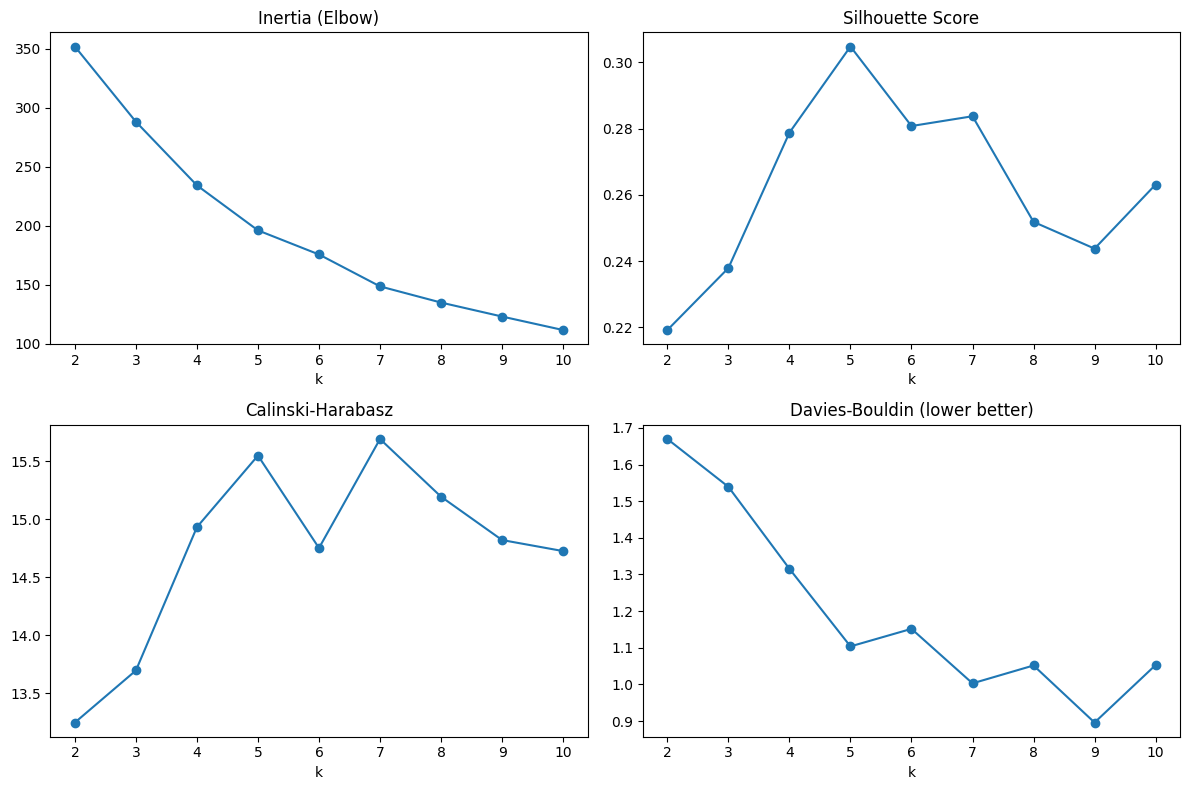


Selected k (highest silhouette): 5  (silhouette=0.3048)

Cluster summary (means & count):


,Cluster,Class_Size,Avg_Experience,Female_Ratio,Industry_Diversity,Dues_Participation_Rate,Avg_Attendance_Count,Mentoring_Offer_Rate,Placement_Offer_Rate,Count
3,3,18.762,6.527,0.006,3.857,0.421,0.075,0.003,0.0,21
1,1,52.600,18.418,0.000,18.467,0.282,0.035,0.000,0.0,15
2,2,32.091,11.897,0.333,9.182,0.394,0.342,0.015,0.0,11
0,0,19.000,10.375,0.133,8.500,0.000,0.136,0.000,0.0,4
4,4,26.750,12.365,0.000,14.250,0.400,0.305,0.115,0.0,4


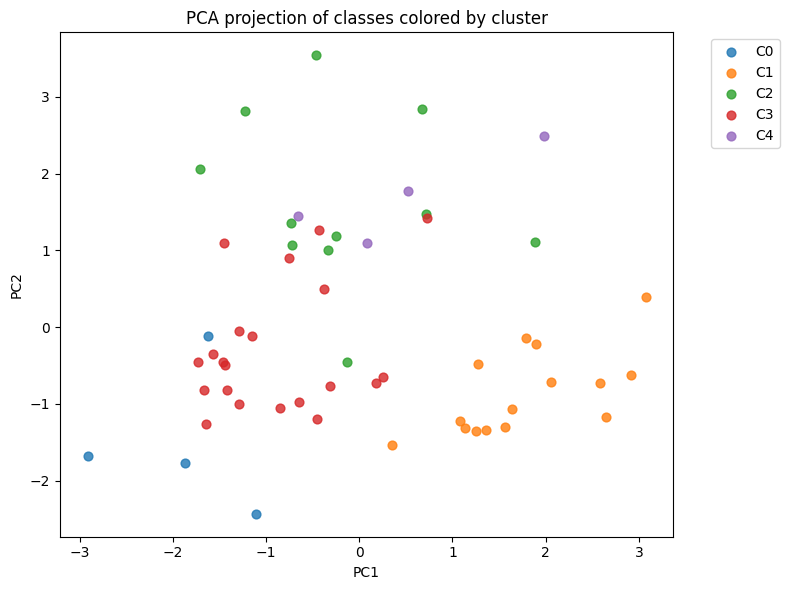

Saved df_with_clusters.csv, kmeans_final.joblib, scaler.joblib


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import joblib

# --- load
df = pd.read_csv("df_final_clean_for_clustering.csv")
df.index.name = 'idx'
print("Loaded df:", df.shape)
display(df.head())

# --- features
features = ['Class_Size','Avg_Experience','Female_Ratio','Industry_Diversity',
            'Total_Dues_Collected','Dues_Participation_Rate','Avg_Attendance_Count',
            'Mentoring_Offer_Rate','Placement_Offer_Rate']

X = df[features].copy()

# --- quick diagnostics
print("\nMissing values per feature:")
print(X.isna().sum())

# --- transform skewed monetary feature: log1p
X['Total_Dues_Collected_log'] = np.log1p(X['Total_Dues_Collected'])
# optionally remove original or keep both; we'll drop original to avoid double-counting
X.drop(columns=['Total_Dues_Collected'], inplace=True)

# --- impute & scale
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imp)

# --- try K from 2..10 and compute metrics
ks = range(2, 11)
inertias = []
sil_scores = []
ch_scores = []
db_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# --- plot metrics
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(ks, inertias, '-o'); plt.title('Inertia (Elbow)'); plt.xlabel('k')
plt.subplot(2,2,2)
plt.plot(ks, sil_scores, '-o'); plt.title('Silhouette Score'); plt.xlabel('k')
plt.subplot(2,2,3)
plt.plot(ks, ch_scores, '-o'); plt.title('Calinski-Harabasz'); plt.xlabel('k')
plt.subplot(2,2,4)
plt.plot(ks, db_scores, '-o'); plt.title('Davies-Bouldin (lower better)'); plt.xlabel('k')
plt.tight_layout()
plt.show()

# --- choose optimal k by highest silhouette
best_k = ks[int(np.argmax(sil_scores))]
print(f"\nSelected k (highest silhouette): {best_k}  (silhouette={max(sil_scores):.4f})")

# --- final fit
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=50)
labels_final = kmeans_final.fit_predict(X_scaled)
df['Cluster'] = labels_final

# --- cluster summary (means on original features) 
cluster_summary = df.groupby('Cluster')[['Class_Size','Avg_Experience','Female_Ratio','Industry_Diversity',
                                         'Dues_Participation_Rate','Avg_Attendance_Count',
                                         'Mentoring_Offer_Rate','Placement_Offer_Rate']].mean().round(3)
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_summary['Count'] = cluster_sizes
cluster_summary = cluster_summary.reset_index().sort_values('Count', ascending=False)
print("\nCluster summary (means & count):")
display(cluster_summary)

# --- PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for c in sorted(df['Cluster'].unique()):
    mask = df['Cluster']==c
    plt.scatter(Z[mask,0], Z[mask,1], label=f"C{c}", s=40, alpha=0.8)
plt.title("PCA projection of classes colored by cluster")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# --- save outputs
df.to_csv("df_with_clusters.csv", index=False)
joblib.dump(kmeans_final, "kmeans_final.joblib")
joblib.dump(scaler, "scaler.joblib")
print("Saved df_with_clusters.csv, kmeans_final.joblib, scaler.joblib")

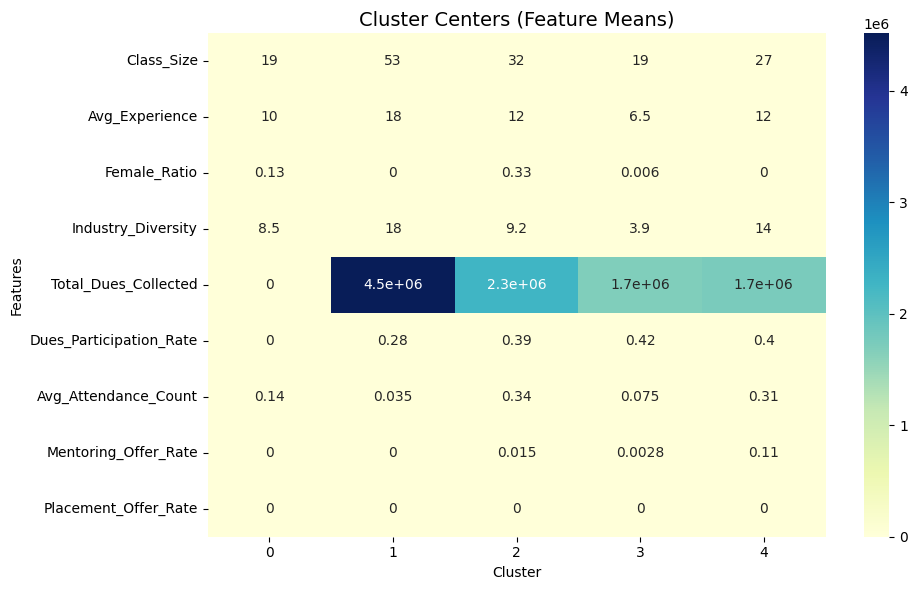

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cluster results
df_clusters = pd.read_csv("df_with_clusters.csv")

# Group by cluster to get cluster centers (means)
cluster_centers = df_clusters.groupby("Cluster").mean(numeric_only=True)

# Plot heatmap of standardized values
plt.figure(figsize=(10,6))
sns.heatmap(cluster_centers.T, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Cluster Centers (Feature Means)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [19]:
# Show sample of class assignments
assignments = df_clusters[["Class", "Cluster"]].sort_values("Cluster")
print(assignments.head(30))

# Save to CSV for inspection
assignments.to_csv("class_cluster_assignments.csv", index=False)

     Class  Cluster
0   AGMP10        0
29   OMP36        0
7    AMP33        0
27   OMP34        0
54   SMP91        1
53   SMP90        1
35   SMP71        1
24   OMP30        1
30   OMP37        1
43   SMP79        1
44   SMP80        1
46   SMP82        1
31   OMP38        1
47   SMP83        1
48   SMP84        1
49   SMP85        1
52   SMP89        1
51   SMP87        1
50   SMP86        1
32   SMP68        2
33   SMP69        2
34   SMP70        2
23   OMP29        2
36   SMP72        2
38   SMP74        2
20    MAP9        2
19    MAP8        2
18    MAP7        2
8    AMP34        2
12   MAP10        2


In [20]:
# Reload placement sheet
placement_df = pd.read_excel(file_path, sheet_name="Placement")

print("Placement shape:", placement_df.shape)
print("Placement columns:", placement_df.columns.tolist())
print("Sample class values:", placement_df['Class'].dropna().unique()[:20])

# Check how many placement entries per Class
placement_counts = placement_df.groupby("Class").size().reset_index(name="Placement_Count")
print(placement_counts.head())

Placement shape: (42, 7)
Placement columns: ['Offering placement/internship opportunity', 'Mr', 'Lagos, Nigeria', 'AMP21', 'Self-employed', 'Principal Partner', 'Kola Ogungbola & Co. (Chartered Accountants)']


KeyError: 'Class'

In [21]:
import pandas as pd
import numpy as np
import re
from IPython.display import display

file_path = "/kaggle/input/alumni-dataset/Project Demography and behavioural for use.xlsx"

# 1) Load placement sheet WITHOUT header to inspect raw layout
placement_raw = pd.read_excel(file_path, sheet_name="Placement", header=None)
print("Raw placement shape:", placement_raw.shape)
display(placement_raw.head(10))

# 2) Try to detect which column contains class-like tokens.
# Define a regex for class codes (adjust if your codes differ)
class_regex = re.compile(r'\b([A-Z]{2,5}\s*\d{1,3}|FTMBA\d|EMBA\d|AMP\d|SMP\d|OMP\d|MAP\d|AGMP\d|CEP\d)\b', re.IGNORECASE)

# Build a function to find a candidate column index
def find_class_column_candidate(df):
    col_scores = {}
    for col in df.columns:
        # examine top N rows for tokens
        sample = df[col].astype(str).fillna('').head(30).tolist()
        matches = sum(1 for v in sample if class_regex.search(v))
        col_scores[col] = matches
    # return column index with highest matches (if >0)
    sorted_cols = sorted(col_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_cols

candidates = find_class_column_candidate(placement_raw)
print("Candidate columns (col_index, match_count):", candidates[:8])

# 3) Choose the best column (first with positive matches)
best_col = None
for idx, count in candidates:
    if count > 0:
        best_col = idx
        break

if best_col is None:
    raise ValueError("Could not auto-detect a class column in Placement sheet. Inspect placement_raw.head() and pick a column index manually.")
else:
    print("Using column index", best_col, "as the Class column. Sample values:")
    display(placement_raw[best_col].head(20))

# 4) Create a dataframe with that column and other useful cols; promote header if necessary
# Try to promote the first row as header if that looks like headers; otherwise keep rows intact.
placement_df = pd.read_excel(file_path, sheet_name="Placement", header=0)  # try with header=0 first
if 'Class' not in placement_df.columns and placement_df.shape[1] > best_col:
    # fallback: read with header=None and rename the detected col to 'Class'
    placement_df = pd.read_excel(file_path, sheet_name="Placement", header=None)
    placement_df = placement_df.rename(columns={best_col: 'Class'})
else:
    # If header=0 gave a DataFrame, but no 'Class', set 'Class' from detected column index in the raw
    if 'Class' not in placement_df.columns:
        # convert column index to column name from placement_df
        colname = placement_df.columns[best_col]
        placement_df = placement_df.rename(columns={colname: 'Class'})

# 5) Standardize Class values (uppercase, remove punctuation), handle multi-class cells with '/'
def standardize_class_value(x):
    if pd.isna(x): return 'UNKNOWN'
    s = str(x).upper().strip()
    # replace separators and remove odd chars except slash
    s = re.sub(r'[\|;]+', '/', s)
    s = re.sub(r'[^A-Z0-9/ ]', '', s)
    s = s.replace(' ', '')
    return s if s != '' else 'UNKNOWN'

placement_df['Class'] = placement_df['Class'].apply(standardize_class_value)

# 6) If there's a respondent identifier column, ensure Alumni_ID exists; otherwise create one
# Look for common id columns (S/N, Serial, ID). If none, create from index.
id_col = None
for cand in ['S/N','SN','ID','Alumni_ID','Alumni ID','Serial']:
    if cand in placement_df.columns:
        id_col = cand
        break

if id_col:
    placement_df['Alumni_ID'] = placement_df[id_col].astype(str).str.strip().replace('nan','')
else:
    placement_df['Alumni_ID'] = 'PlacementIdx__' + placement_df.index.astype(str)

# 7) Explode multi-class rows (e.g., "AMP31/SMP52")
placement_df['Class'] = placement_df['Class'].astype(str)
placement_df = placement_df.assign(Class=placement_df['Class'].str.split('/')).explode('Class').reset_index(drop=True)
placement_df['Class'] = placement_df['Class'].str.strip().replace('', 'UNKNOWN')

# 8) Filter to valid-looking classes (must contain a letter)
placement_df = placement_df[placement_df['Class'].str.contains(r'[A-Z]')].reset_index(drop=True)
print("Cleaned placement rows (sample):", placement_df.shape)
display(placement_df.head(30))

# 9) Compute unique placement offers per class (unique Alumni_IDs)
placement_counts = placement_df.groupby('Class').agg(Placement_Count=('Alumni_ID', 'nunique')).reset_index()
print("Placement counts sample:")
display(placement_counts.head(30))

# 10) Merge placement counts into df_with_clusters.csv (your clustered dataframe)
df_clusters = pd.read_csv("df_with_clusters.csv")
df_clusters = df_clusters.merge(placement_counts, on='Class', how='left')
df_clusters['Placement_Count'] = df_clusters['Placement_Count'].fillna(0).astype(int)

# 11) Compute Placement_Offer_Rate = Placement_Count / Class_Size (safe divide)
df_clusters['Placement_Offer_Rate_new'] = df_clusters.apply(
    lambda r: r['Placement_Count'] / r['Class_Size'] if r['Class_Size'] > 0 else 0, axis=1
)

# 12) See how many classes got placement offers and sample updates
print("Number of classes with placement offers:", (df_clusters['Placement_Count']>0).sum())
display(df_clusters[df_clusters['Placement_Count']>0][['Class','Class_Size','Placement_Count','Placement_Offer_Rate_new']].head(40))

# 13) Replace old Placement_Offer_Rate with the new one and save
df_clusters['Placement_Offer_Rate'] = df_clusters['Placement_Offer_Rate_new']
df_clusters.drop(columns=['Placement_Offer_Rate_new'], inplace=True)
df_clusters.to_csv("df_with_clusters_placement_fixed.csv", index=False)
print("Merged placement counts and saved df_with_clusters_placement_fixed.csv")

# 14) Updated cluster summary (means & counts) to inspect impact
cluster_summary_updated = df_clusters.groupby('Cluster')[['Class_Size','Avg_Experience','Female_Ratio','Industry_Diversity',
                                                         'Dues_Participation_Rate','Avg_Attendance_Count','Mentoring_Offer_Rate','Placement_Offer_Rate']].mean().round(4)
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()
cluster_summary_updated['Count'] = cluster_counts
print("Updated cluster summary with Placement_Offer_Rate:")
display(cluster_summary_updated.reset_index())

Raw placement shape: (43, 7)


,0,1,2,3,4,5,6
0,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",AMP21,Self-employed,Principal Partner,Kola Ogungbola & Co. (Chartered Accountants)
1,Offering placement/internship opportunity,CEO1,Lagos,AMP22,Self-employed,CEO,NaN
2,Offering placement/internship opportunity,Mr.,"Lagos, Nigeria",EMBA17,Self-employed,CEO,V-Capital Consulting Ltd
3,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",FTMBA2,Self-employed,CEO,RCO & Associates
4,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",SMP44,Self-employed,Deputy Managing Director/Deputy Editor-in-Chief,The Sun Newspapers
5,Offering placement/internship opportunity,Mrs.,Lagos/Nigeria,SMP75,Employed,HR Manager,Pan-Atlantic University
6,Offering placement/internship opportunity,MR,LAGOS/NIGERIA,OPM17/AGMP05,Self-employed,DIRECTOR,ARIES SYSTEMCOM TECH ENGINEERING LIMITED
7,Offering placement/internship opportunity,Mr.,"Lekki, Lagos",EMBA23,Employed,Director,FIRS
8,Offering placement/internship opportunity,MR,"LAGOS, NIGERIA",AMP26,Self-employed,MANAGING CONSULTANT,BHL PROFESSIONAL SERVICES
9,"Offering placement/internship opportunity, Adv...",Engr.,"Port Harcourt, Nigeria",OMP17,Self-employed,MD/CEO,Jocaro Nigeria Ltd


Candidate columns (col_index, match_count): [(3, 30), (1, 1), (2, 1), (0, 0), (4, 0), (5, 0), (6, 0)]
Using column index 3 as the Class column. Sample values:


0            AMP21
1            AMP22
2           EMBA17
3           FTMBA2
4            SMP44
5            SMP75
6     OPM17/AGMP05
7           EMBA23
8            AMP26
9            OMP17
10           SMP47
11          AGMP14
12           OMP16
13           SMP30
14           SMP75
15           SMP56
16           AMP11
17           OMP20
18            MAP6
19           OMP27
Name: 3, dtype: object

Cleaned placement rows (sample): (44, 8)


,0,1,2,Class,4,5,6,Alumni_ID
0,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",AMP21,Self-employed,Principal Partner,Kola Ogungbola & Co. (Chartered Accountants),PlacementIdx__0
1,Offering placement/internship opportunity,CEO1,Lagos,AMP22,Self-employed,CEO,NaN,PlacementIdx__1
2,Offering placement/internship opportunity,Mr.,"Lagos, Nigeria",EMBA17,Self-employed,CEO,V-Capital Consulting Ltd,PlacementIdx__2
3,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",FTMBA2,Self-employed,CEO,RCO & Associates,PlacementIdx__3
4,Offering placement/internship opportunity,Mr,"Lagos, Nigeria",SMP44,Self-employed,Deputy Managing Director/Deputy Editor-in-Chief,The Sun Newspapers,PlacementIdx__4
5,Offering placement/internship opportunity,Mrs.,Lagos/Nigeria,SMP75,Employed,HR Manager,Pan-Atlantic University,PlacementIdx__5
6,Offering placement/internship opportunity,MR,LAGOS/NIGERIA,OPM17,Self-employed,DIRECTOR,ARIES SYSTEMCOM TECH ENGINEERING LIMITED,PlacementIdx__6
7,Offering placement/internship opportunity,MR,LAGOS/NIGERIA,AGMP05,Self-employed,DIRECTOR,ARIES SYSTEMCOM TECH ENGINEERING LIMITED,PlacementIdx__6
8,Offering placement/internship opportunity,Mr.,"Lekki, Lagos",EMBA23,Employed,Director,FIRS,PlacementIdx__7
9,Offering placement/internship opportunity,MR,"LAGOS, NIGERIA",AMP26,Self-employed,MANAGING CONSULTANT,BHL PROFESSIONAL SERVICES,PlacementIdx__8


Placement counts sample:


,Class,Placement_Count
0,AGMP05,1
1,AGMP14,1
2,AGMP5,1
3,AMP11,1
4,AMP16CEP19IMP1,1
5,AMP21,1
6,AMP22,1
7,AMP26,1
8,CEP24,1
9,EMBA11,1


Number of classes with placement offers: 5


,Class,Class_Size,Placement_Count,Placement_Offer_Rate_new
21,OMP27,27,1,0.037037
24,OMP30,30,1,0.033333
25,OMP31,17,1,0.058824
39,SMP75,50,5,0.100000
40,SMP76,19,1,0.052632


Merged placement counts and saved df_with_clusters_placement_fixed.csv
Updated cluster summary with Placement_Offer_Rate:


,Cluster,Class_Size,Avg_Experience,Female_Ratio,Industry_Diversity,Dues_Participation_Rate,Avg_Attendance_Count,Mentoring_Offer_Rate,Placement_Offer_Rate,Count
0,0,19.0000,10.3752,0.1325,8.5000,0.0000,0.1362,0.0000,0.0000,4
1,1,52.6000,18.4184,0.0000,18.4667,0.2820,0.0352,0.0000,0.0022,15
2,2,32.0909,11.8972,0.3326,9.1818,0.3936,0.3417,0.0146,0.0000,11
3,3,18.7619,6.5275,0.0060,3.8571,0.4213,0.0752,0.0028,0.0046,21
4,4,26.7500,12.3651,0.0000,14.2500,0.3998,0.3054,0.1148,0.0382,4
